# Visualizing effect of weather on number of confirmed coronavirus cases.
The weather condition for different states of countries based on the lat/long values were collected from weather online website. It was assumed that weather condition all over the province remained same for a particular day. Data for confirmed cases of coronavirus from January 2020 to April 2020 was imported from Kaggle.     

The number of confirmed cases were plotted against different weather conditions vis. temperature, humidity etc. to see if there is any correlation between weather conditions and coronavirus spred. It was noted that there was number of spread of coronavirus was maximum at room temperature conditions. 

This project was a simple analysis to get initial understanding between covid spread and weather conditions. Further statistical analysis is required to better understand the effect of weather conditions on the spread of Covid 19.

In [75]:
#import required libraries 
import pandas as pd
import numpy as np 
%matplotlib notebook
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [5]:
#Import dataframes with integer latitude longitude and actual latitude longitude

df= pd.read_csv(r'C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_2\Project\Corona\covid_19_clean_complete_lat_long.csv' 
                )
df_actual_latlong = pd.read_csv(r'C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_2\Project\Corona\covid_19_clean_complete.csv' 
                )


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [6]:
df.rename(columns={'Province/State':'Province','Country/Region':'Region'},inplace=True)

,Province,Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33,65,1/22/20,0,0,0
1,NaN,Afghanistan,33,65,1/23/20,0,0,0
2,NaN,Afghanistan,33,65,1/24/20,0,0,0
3,NaN,Afghanistan,33,65,1/25/20,0,0,0
4,NaN,Afghanistan,33,65,1/26/20,0,0,0
...,...,...,...,...,...,...,...,...
23575,NaN,Zimbabwe,-20,30,4/16/20,23,3,1
23576,NaN,Zimbabwe,-20,30,4/17/20,24,3,2
23577,NaN,Zimbabwe,-20,30,4/18/20,25,3,2
23578,NaN,Zimbabwe,-20,30,4/19/20,25,3,2


In [7]:
#Add a column to identify the different latitude and longitude in the data
df['latstr']=df['Lat'].astype('str')+'/'+df['Long'].astype('str')

df_lat_long=df.groupby(df['latstr'], sort=False).min()
list_n90=[]
#Make a data frame which sorted by latitude and longitude
df_covid=pd.DataFrame()
for name, group in df.groupby(df['latstr'], sort=False):
    df_covid=df_covid.append(group)
    if len(group)!=90:
        list_n90.append(name)


# df_lat_long=df[df['latstr']==df['latstr'].unique()]

17/-62 180
13/-60 180
0/0 270
40/116 180
22/114 180
-4/22 180
15/-61 180
18/-63 360


In [8]:
df_covid

,Province,Region,Lat,Long,Date,Confirmed,Deaths,Recovered,latstr
0,NaN,Afghanistan,33,65,1/22/20,0,0,0,33/65
1,NaN,Afghanistan,33,65,1/23/20,0,0,0,33/65
2,NaN,Afghanistan,33,65,1/24/20,0,0,0,33/65
3,NaN,Afghanistan,33,65,1/25/20,0,0,0,33/65
4,NaN,Afghanistan,33,65,1/26/20,0,0,0,33/65
...,...,...,...,...,...,...,...,...,...
23575,NaN,Zimbabwe,-20,30,4/16/20,23,3,1,-20/30
23576,NaN,Zimbabwe,-20,30,4/17/20,24,3,2,-20/30
23577,NaN,Zimbabwe,-20,30,4/18/20,25,3,2,-20/30
23578,NaN,Zimbabwe,-20,30,4/19/20,25,3,2,-20/30


In [9]:
# Import weather data from  World Weather Online
#the website was allowing data to be extracted for a range of 30 laocation. 
# Different lists are prepared for a group of 30 locations to extract data

location_listf=df_lat_long.index.to_list()
location_list1=location_listf[0:31]
location_list2=location_listf[31:61]
location_list3=location_listf[61:91]
location_list4=location_listf[91:111]
location_list5=location_listf[111:131]
location_list6=location_listf[131:151]
location_list7=location_listf[151:171]
location_list8=location_listf[171:191]
location_list9=location_listf[191:211]
location_list10=location_listf[211:231]
location_list11=location_listf[231:251]


251


In [10]:
ind_n90=[location_listf.index(i) for i in list_n90]


[5, 21, 49, 56, 66, 87, 98, 116]

In [99]:
#Import the wwo-hist package to import data from World Weather Online, first you have to sign
# in and get the api-key and put it as a string as an api_key parameter

from wwo_hist import retrieve_hist_data


In [372]:

frequency = 24
start_date = '22-JAN-2020'
end_date = '20-APR-2020'
api_key = 'your id'
location_list = location_list3
hist_weather_data=retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = True,
                                export_csv = False,
                                store_df = True)



Retrieving weather data for 24/109


Currently retrieving data for 24/109: from 2020-01-22 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.205959
Currently retrieving data for 24/109: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:01.640879
Currently retrieving data for 24/109: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.149557
Currently retrieving data for 24/109: from 2020-04-01 to 2020-04-20
Time elapsed (hh:mm:ss.ms) 0:00:02.478677


Retrieving weather data for 27/107


Currently retrieving data for 27/107: from 2020-01-22 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:00.249334
Currently retrieving data for 27/107: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:00.774962
Currently retrieving data for 27/107: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:01.295537
Currently retrieving data for 27/107: from 2020-04-01 to 2020-04-20
Time elapsed (hh:mm:ss.ms) 0:00:01.596245


Retrieving weather data for 19/110


Cur

Time elapsed (hh:mm:ss.ms) 0:00:00.511665
Currently retrieving data for 31/121: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:01.531769
Currently retrieving data for 31/121: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.595211
Currently retrieving data for 31/121: from 2020-04-01 to 2020-04-20
Time elapsed (hh:mm:ss.ms) 0:00:04.289365


Retrieving weather data for 38/112


Currently retrieving data for 38/112: from 2020-01-22 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:00.409905
Currently retrieving data for 38/112: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:06.655675
Currently retrieving data for 38/112: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:07.593958
Currently retrieving data for 38/112: from 2020-04-01 to 2020-04-20
Time elapsed (hh:mm:ss.ms) 0:00:09.406112


Retrieving weather data for 31/103


Currently retrieving data for 31/103: from 2020-01-22 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:00.525021


In [373]:
#Store the imported weather data into a dataframe

df_weather3n=pd.DataFrame()
for dtf in hist_weather_data:
    dtf.columns= ['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'uvIndex',
       'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph']
    df_weather3n=df_weather3n.append(dtf)
    
    
# print(df_weather1)

In [374]:
# Export the weather data for later use 
df_weather3n.to_csv(r'C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_2\Project\weather3n.csv')

In [359]:
## Interstingly due to rounding off the Lat/Long there were 9 places who were very close, and they
# ended up with same lat/long due to rounding off errors. In this study it was assumed that as these 
#locations were not that far from each other therefore they were assumed to have same weather
#The following code were used to populate the weather data for these 9 locations from nearby location


df_weather1e=df_weather1.copy()
df_weather1e.reset_index(inplace=True,drop=True)
#the copy data frame1
df_weather1ec1=df_weather1e.iloc[90*5:90*6, :]
#the start data frame
df_weather1es=df_weather1e.iloc[0:90*6, :].append(df_weather1ec1)
#the middle data frame
df_weather1em=df_weather1e.iloc[90*6:90*21, :]
#the copy data frame2
df_weather1ec2=df_weather1e.iloc[90*21:90*22, :]
#the end data frame
df_weather1ee=df_weather1ec2.append(df_weather1e.iloc[90*21 :, :])
#now combine the start, middle and end dataframe
df_weather1e_half=df_weather1es.append(df_weather1em)
df_weather1ef=df_weather1e_half.append(df_weather1ee)

In [361]:
df_weather2e=df_weather2.copy()
df_weather2e.reset_index(inplace=True,drop=True)
#the copy data frame1
df_weather2ec1=df_weather2e.iloc[90*18:90*19, :]
#the start data frame
df_weather2es1=df_weather2e.iloc[0:90*19, :].append(df_weather2ec1)
df_weather2es=df_weather2es1.append(df_weather2ec1)
#the middle data frame
df_weather2em=df_weather2e.iloc[90*19:90*25, :]
#the copy data frame2
df_weather2ec2=df_weather2e.iloc[90*25:90*26, :]
#the end data frame
df_weather2ee=df_weather2ec2.append(df_weather2e.iloc[90*25 :, :])
#now combine the start, middle and end dataframe
df_weather2e_half=df_weather2es.append(df_weather2em)
df_weather2ef=df_weather2e_half.append(df_weather2ee)

In [362]:
df_weather3e=df_weather3.copy()
df_weather3e.reset_index(inplace=True,drop=True)
#the copy data frame1
df_weather3ec1=df_weather3e.iloc[90*5:90*6, :]
#the start data frame
df_weather3es=df_weather3e.iloc[0:90*6, :].append(df_weather3ec1)
#the middle data frame
df_weather3em=df_weather3e.iloc[90*6:90*26, :]
#the copy data frame2
df_weather3ec2=df_weather3e.iloc[90*26:90*27, :]
#the end data frame
df_weather3ee=df_weather3ec2.append(df_weather3e.iloc[90*26 :, :])
#now combine the start, middle and end dataframe
df_weather3e_half=df_weather3es.append(df_weather3em)
df_weather3ef=df_weather3e_half.append(df_weather3ee)

In [383]:
df_weather4e=df_weather4.copy()
df_weather4e.reset_index(inplace=True,drop=True)
#the copy data frame1
df_weather4ec1=df_weather4e.iloc[90*7:90*8, :]
#the start data frame
df_weather4es=df_weather4e.iloc[0:90*8, :].append(df_weather4ec1)

#now combine the start, middle and end dataframe

df_weather4ef=df_weather4es.append(df_weather4e.iloc[90*8 :, :])


In [391]:
df_weather5e=df_weather5.copy()
df_weather5e.reset_index(inplace=True,drop=True)
#the copy data frame1
df_weather5ec1=df_weather5e.iloc[90*5:90*6, :]
#the start data frame
df_weather5es=df_weather5e.iloc[0:90*6, :].append([df_weather5ec1, df_weather5ec1, df_weather5ec1])

#now combine the start, middle and end dataframe

df_weather5ef=df_weather5es.append(df_weather5e.iloc[90*6 :, :])

In [393]:
#Make a list for all the dataframes

df_list=[df_weather1ef, df_weather2ef, df_weather3ef, df_weather4ef, df_weather5ef, df_weather6, df_weather7,
        df_weather8, df_weather9, df_weather10, df_weather11]

In [394]:
#Make the final weather dataframe

df_weather_final=pd.DataFrame()
for datf in df_list:
    df_weather_final=df_weather_final.append(datf, ignore_index=True)

In [16]:
df_weather_final = pd.read_csv(r'C:\Users\sharm.LAPTOP-118C54MT\OneDrive - York University\Coursera\Course_2\Project\weather_final.csv' 
                )
df_weather_final

,Unnamed: 0,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0,2020-01-22,-4,-12,1.7,2.0,1,1,11,07:19 AM,...,-12,24,83,91,2.7,992,-4,6,193,15
1,1,2020-01-23,-4,-10,0.0,5.8,2,2,3,08:19 AM,...,-13,28,36,85,0.0,989,-4,10,258,17
2,2,2020-01-24,-8,-16,0.0,3.9,1,1,0,09:07 AM,...,-17,22,65,88,0.0,1000,-8,10,271,13
3,3,2020-01-25,-10,-15,0.0,2.0,1,1,0,09:43 AM,...,-19,18,72,89,0.0,999,-10,10,213,10
4,4,2020-01-26,-5,-15,0.2,2.0,1,1,4,10:09 AM,...,-13,14,70,93,0.5,992,-5,8,275,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23575,23575,2020-04-16,19,6,0.0,11.6,5,5,30,03:55 AM,...,12,21,29,46,0.0,1019,19,10,233,14
23576,23576,2020-04-17,21,10,0.0,11.6,5,5,23,04:27 AM,...,15,15,17,51,0.0,1013,21,10,144,9
23577,23577,2020-04-18,16,10,0.0,9.3,3,3,15,04:54 AM,...,13,14,59,57,0.0,1016,16,10,73,10
23578,23578,2020-04-19,17,9,0.0,8.1,3,3,8,05:17 AM,...,11,14,82,65,5.8,1014,17,9,151,9


In [17]:
df_covid[['maxtempC', 'mintempC', 'humidity', 'precipMM']]=df_weather_final[['maxtempC', 'mintempC', 'humidity', 'precipMM']]
df_covid=df_covid.astype({'maxtempC':float, 'mintempC':float, 'humidity':float, 'precipMM':float})

<IPython.core.display.Javascript object>


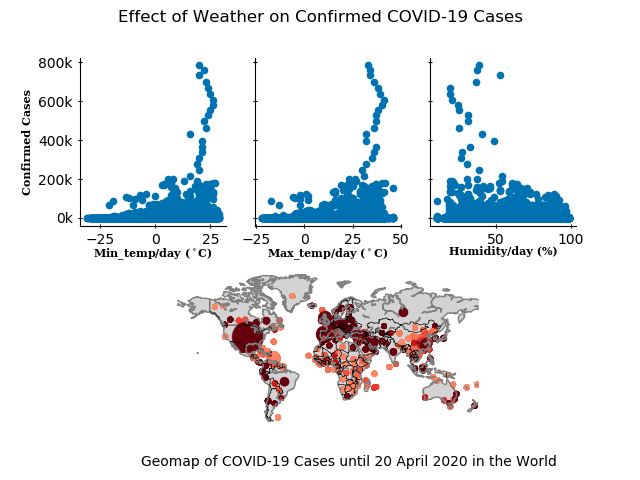

Text(0.22, 0.03, 'Geomap of COVID-19 Cases until 20 April 2020 in the World')

In [222]:
## Set up the plotting environment 

plt.style.use('seaborn-colorblind')
fig=plt.figure()
gspec = gridspec.GridSpec(2, 3)

bottom_map = plt.subplot(gspec[1, 0:])
top_ltemp = plt.subplot(gspec[0, 0:1])
top_mtemp = plt.subplot(gspec[0, 1:2])
top_rhum = plt.subplot(gspec[0, 2:3])

# plot the dataframe 
df_covid.plot('mintempC', 'Confirmed', kind='scatter', ax= top_ltemp)
df_covid.plot('maxtempC', 'Confirmed', kind='scatter', ax= top_mtemp)
df_covid.plot('humidity', 'Confirmed', kind='scatter', ax= top_rhum)
fig.suptitle('Effect of Weather on Confirmed COVID-19 Cases')
fig.text(0.22,0.03, 'Geomap of COVID-19 Cases until 20 April 2020 in the World')





In [223]:
for axo in [top_ltemp,top_mtemp,top_rhum]:
    axo.spines['top'].set_visible(False)
    axo.spines['right'].set_visible(False)
    axo.yaxis.set_tick_params(direction='inout')
    axo.xaxis.set_tick_params(direction='inout')
    axo.xaxis.set_label_coords(0.5,-0.12)
    if axo!= top_ltemp:
        axo.set_ylabel(None)
        axo.set_yticklabels([None, None, None, None, None])

top_ltemp.yaxis.set_ticklabels(['', '0k', '200k', '400k', '600k', '800k'])
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 8,
        }
top_ltemp.yaxis.set_label_text('Confirmed Cases', fontdict=font)
# top_ltemp.xaxis.set_label_coords(0.5,-0.1)
top_ltemp.xaxis.set_label_text('Min_temp/day ($^\circ$C)', fontdict=font)
top_mtemp.xaxis.set_label_text('Max_temp/day ($^\circ$C)', fontdict=font)
top_rhum.xaxis.set_label_text('Humidity/day (%)', fontdict=font)
top_mtemp.xaxis.set_ticks([-25,0,25,50])


In [225]:
### Plot confirmed cases on the geomap 

int_val= np.interp(df_actual_latlong['Confirmed'].to_numpy(), [df_actual_latlong['Confirmed'].to_numpy().min(),\
                                                      df_actual_latlong['Confirmed'].to_numpy().max()],\
          [10,500])

int_color= np.interp(df_actual_latlong['Confirmed'].to_numpy(), [df_actual_latlong['Confirmed'].to_numpy().min(),\
                                                      df_actual_latlong['Confirmed'].to_numpy().max()],\
          [0.4,512])
viridis = cm.get_cmap('Reds', 512)
newcolors = viridis(int_color)
newcmp = ListedColormap(newcolors)
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, \
        llcrnrlon = -180, urcrnrlon= 180, resolution = 'c', ax= bottom_map);

x, y = m(df_actual_latlong['Long'].to_list(), df_actual_latlong['Lat'].to_list())
m_size=(df_actual_latlong['Confirmed']/100000).to_list()

# Change properties of the map

m.drawcoastlines(color='grey');
m.drawcountries(color='black');
m.drawstates(color='lightgreen', zorder=0);
m.fillcontinents(color='lightgray', zorder=0);
m.scatter(x,y,  marker='o', s=int_val, c=newcolors, alpha= 0.4);
bottom_map.axis('off')


(0.0, 40030154.742485225, 0.0, 22300057.555453837)

(0.0, 40030154.742485225, 0.0, 22300057.555453837)